# GG4527- Urban Analytics: A Toolkit for Sustainable Urban Development Assignment 2
## Lab 5: Intro to Networks
-----


### Challenge 1


In [ ]:
import pandas as pd
import networkx as nx

FSdata = pd.read_csv("/Users/Lynsey/Documents/UA_GG4257/UA Repo/Week_5/Lab_5_Data/FS.csv") # read data

graph = nx.from_pandas_edgelist(FSdata, "source", "target") # use this to extract info on the data


In [ ]:
print(len(graph))# indicates the size of the graph i.e how many nodes
print(graph.number_of_edges()) # indicates number of edges
print(type(graph.nodes())) # Tells you the type of 
print(list(graph.edges(data=True))[-1]) # Read the attributes associated with the last element of the edges list. 
print(list(graph.nodes(data=True))[0]) # Read the attributes associated with the first element of the node list.
print(type(list(graph.edges(data=True))[-1][2])) # Which type; therefore, you can see what you are reading.

In [ ]:
degree_centrality = nx.degree_centrality(graph) 
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality:.3f}")

# calculates degree of centrality for each node

To create histogram for the degree of centrality I am using the max and min values along the a log scale to show the histogram. This is because when creating the histogram I found there was only one value being shown which indicates very small differances. Therefore, the histiogram with log scale will show these differences clearer. 

In [ ]:
print(f"Min centrality: {min(centrality_values)}")
print(f"Max centrality: {max(centrality_values)}")

# finding min and max values 

In [ ]:
# creating histo

import numpy as np
import matplotlib.pyplot as plt

centrality_values = list(degree_centrality.values()) # getting values

plt.figure(figsize=(10, 6))
plt.hist(centrality_values, bins=np.logspace(np.log10(min(centrality_values)), np.log10(max(centrality_values)), 50), 
         color='skyblue', edgecolor='black')

plt.xscale("log") # x-axis

plt.title("Histogram of Degree Centrality (Log Scale)") # title
plt.xlabel("Degree Centrality (log scale)") # x-axis label
plt.ylabel("Number of Nodes") # y-axis label 
plt.grid(True)

plt.show()

screenshot

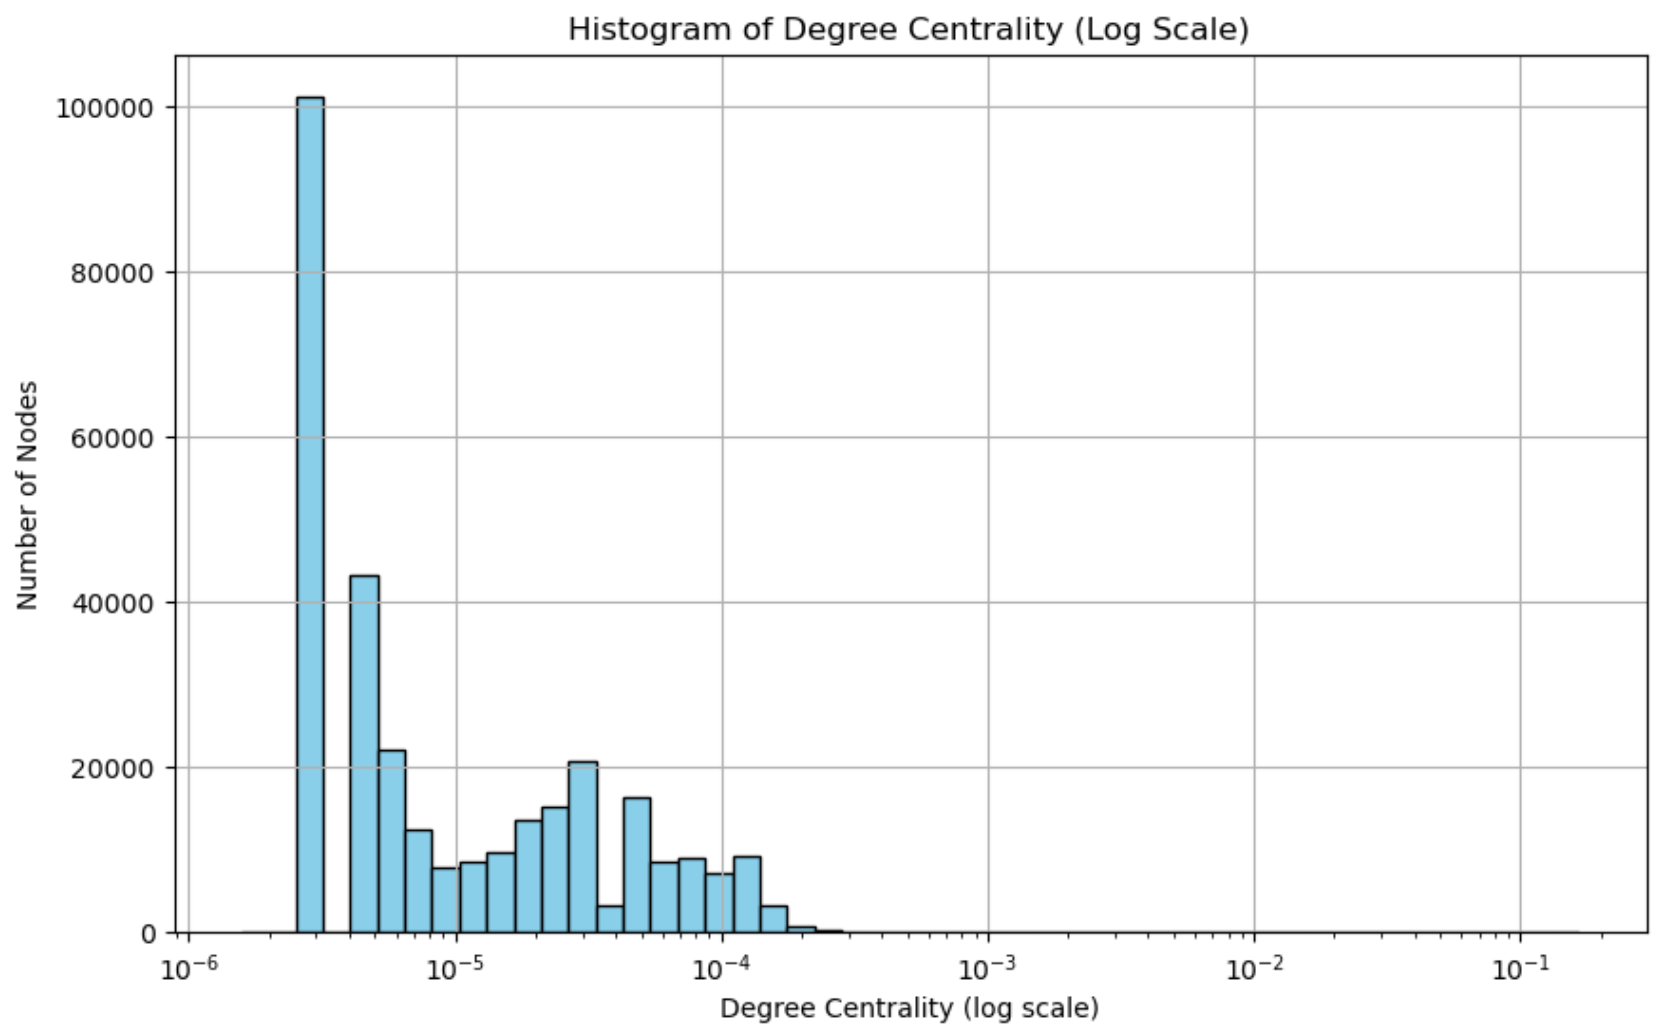

In [ ]:
# finding the top 4 nodes in the group to create subset 

graph_4 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:4] 
print(graph_4)

In [ ]:
graph_4_node = [node for node, _ in graph_4] # extracting just the top 4 node ids

print("Top 4 nodes by degree centrality:", graph_4_node)

subgraph = graph.subgraph(graph_4_node).copy() # creating subset

print(f"Subgraph has {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges") # shows how many nodes and edges are in the sub group

import matplotlib.pyplot as plt
import networkx as nx

# creating graph for subgroup
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color="red", font_size=10, edge_color="gray")

plt.title("Subgraph of the Top 4 Most Central Nodes") # title
plt.show()


screenshot

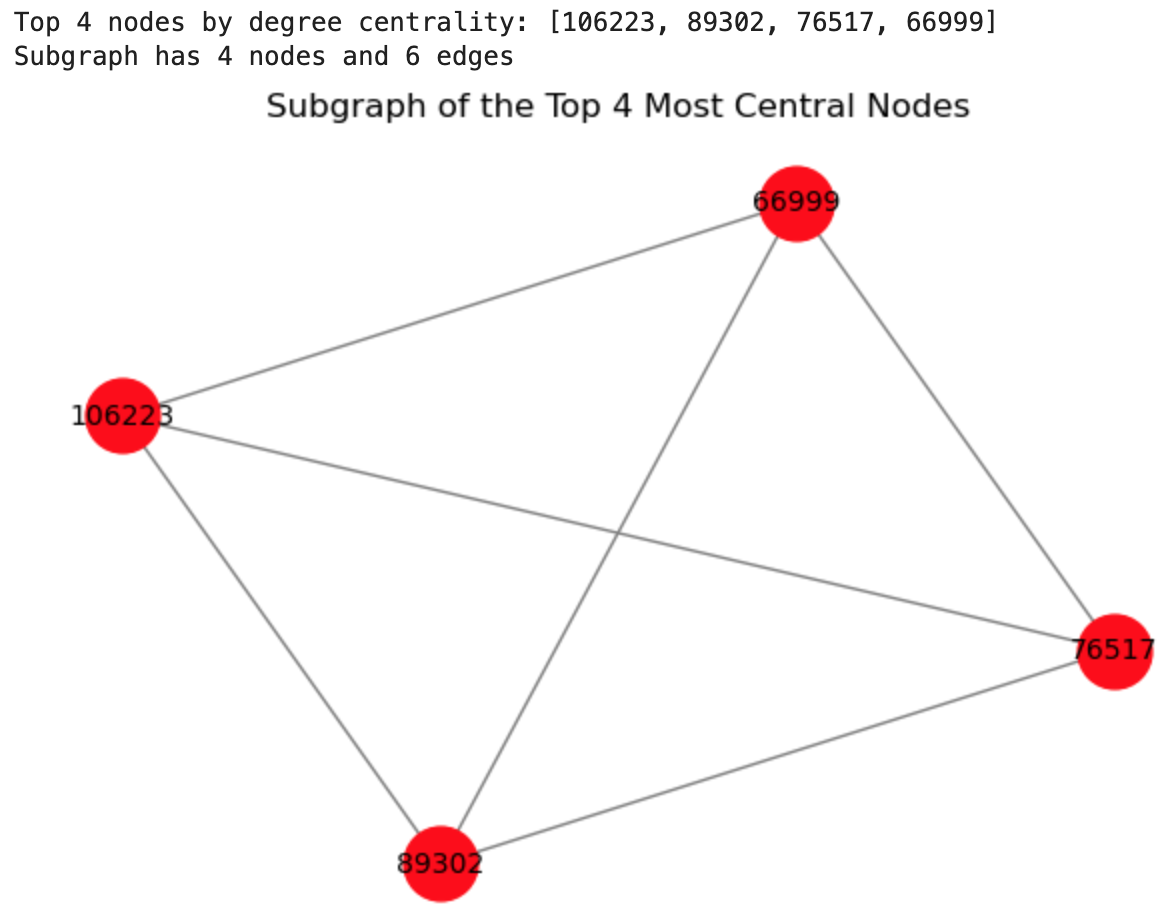

In [ ]:
betweenness_centrality = nx.betweenness_centrality(subgraph) # calculating betweenness centrality for sub group

betweenness_values = list(betweenness_centrality.values()) #converts to list which is used later 

print("Betweenness Centrality:", betweenness_centrality)  # prints values to show betweenness centrality for each of the top nodes


In [ ]:
# creating histo
plt.hist(betweenness_values, bins=20, color='skyblue', edgecolor='black')

plt.title("Histogram of Betweenness Centrality (Subset)") # title
plt.xlabel("Betweenness Centrality") # x-axis label
plt.ylabel("Number of Nodes")  # y-axis label 
plt.grid(True)

plt.show()

screenshot 

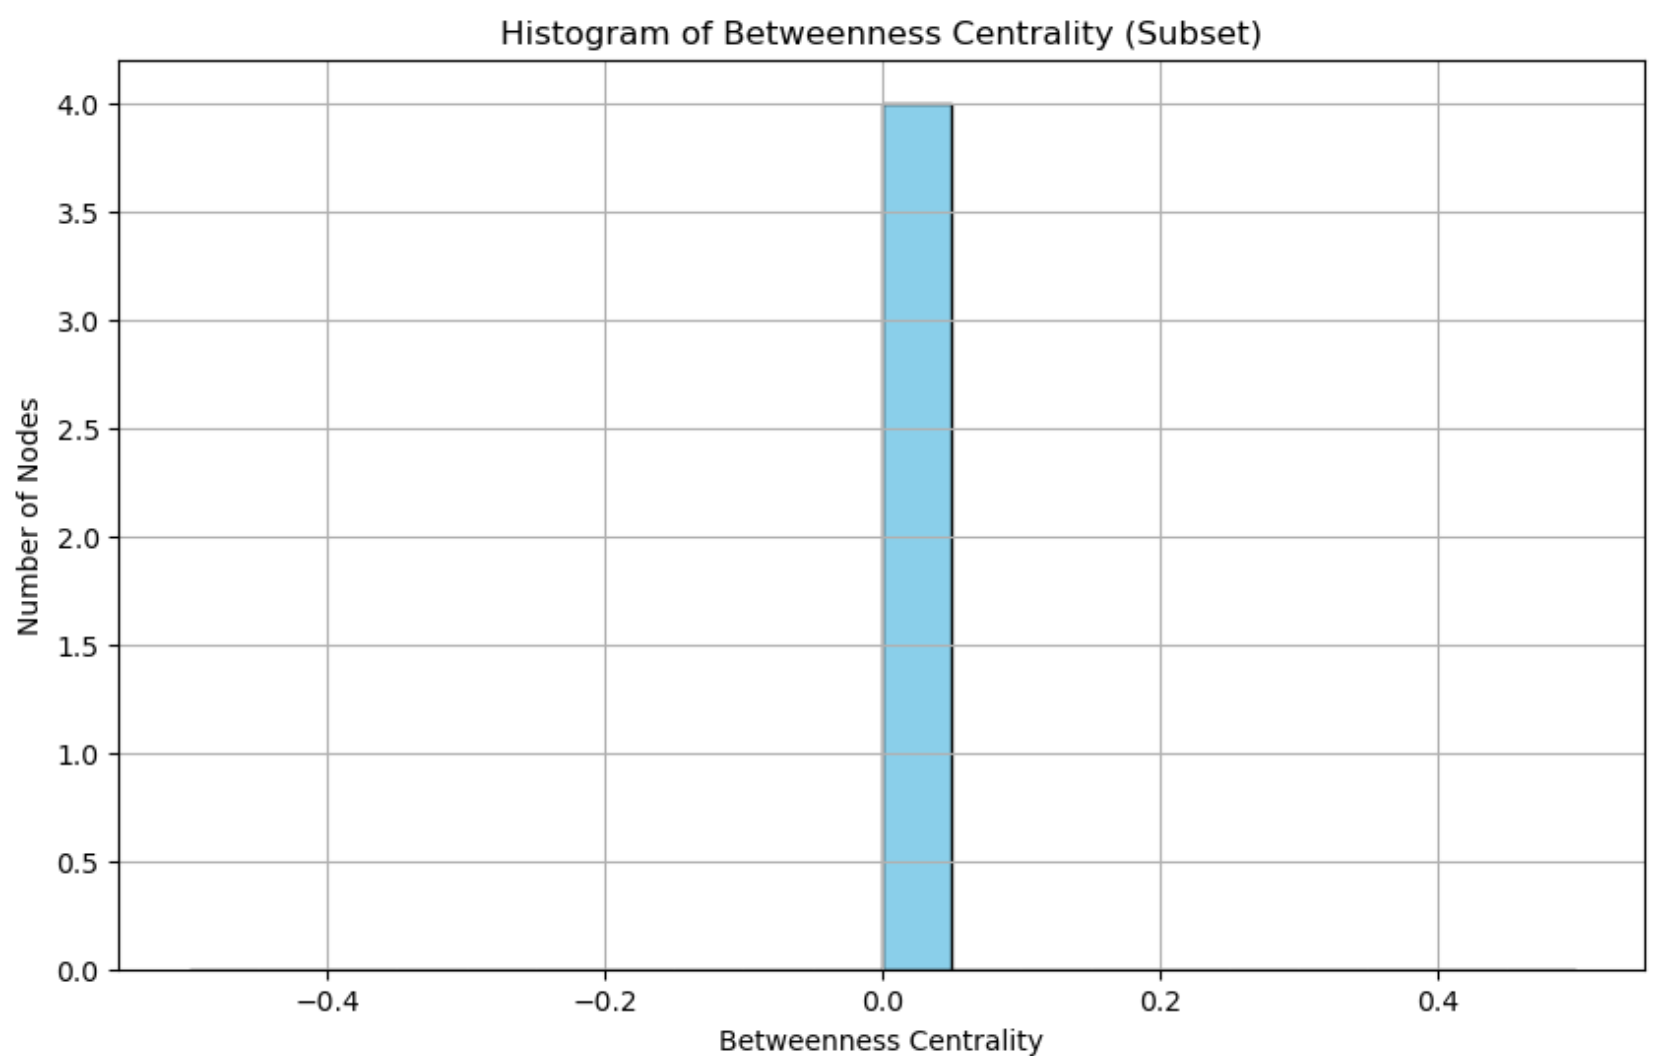

In [ ]:
# matrix plot of sub group
import nxviz as nv
nv.MatrixPlot(subgraph)
plt.title("Matrix Plot of the Subset")
plt.show()

screenshot 

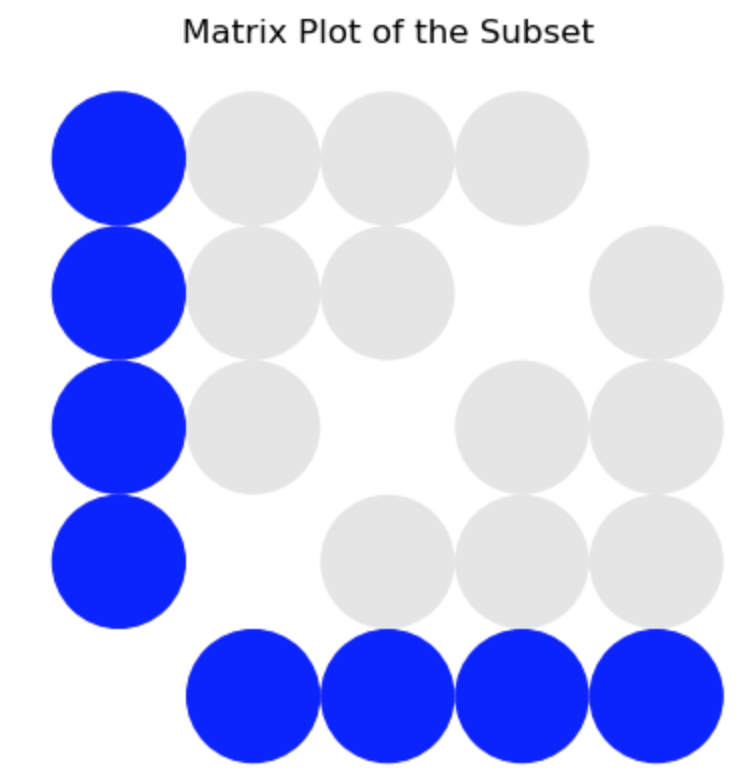

In [ ]:
# Arc plt of sub group 
nv.ArcPlot(subgraph)
plt.title("Arc Diagram of the Subset")
plt.show()

screenshot

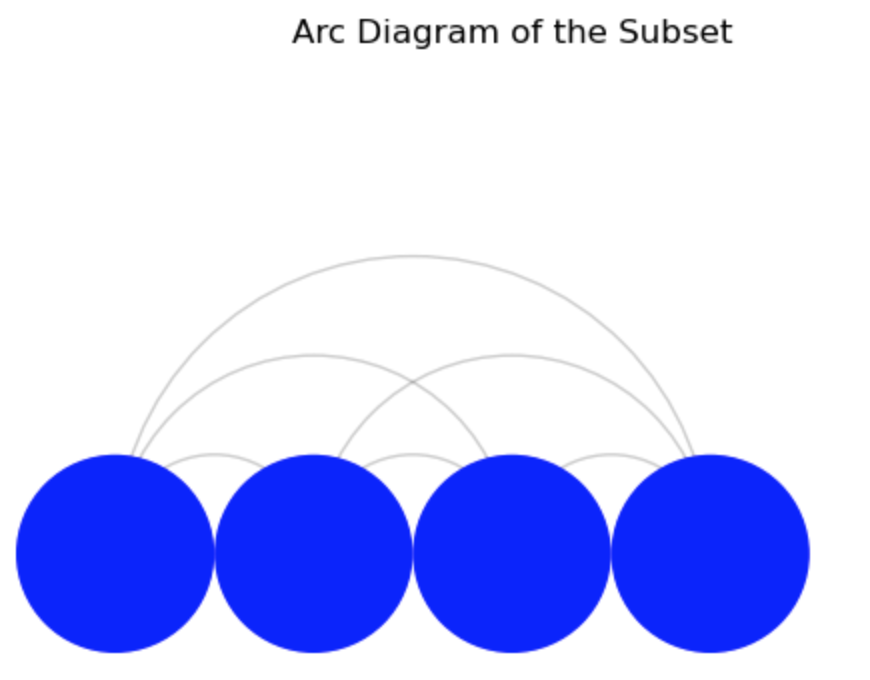

In [ ]:
# circos plot of sub group
nv.CircosPlot(subgraph)
plt.title("Circos Plot of the Subset")
plt.show()

screenshot 

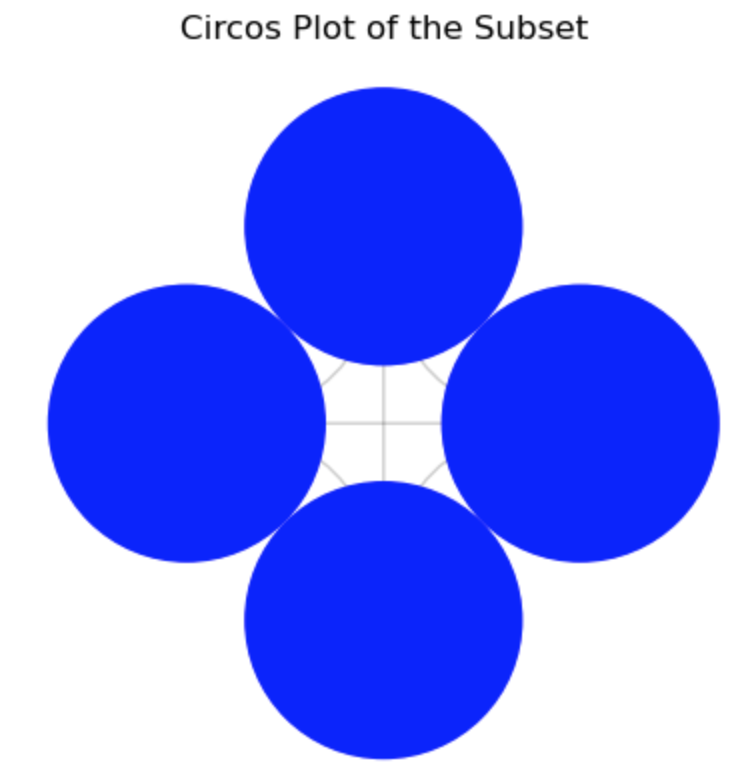
